## Student Name: **Cornelius Brian Loe**
## Student ID: **45710783**
## Github Repo URL = https://github.com/MQCOMP2200-S2-2020/portfolio-2020-BrianLoe

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
sns.set()
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
%matplotlib inline
from sklearn.metrics import r2_score
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn import linear_model
from math import sqrt
from sklearn.metrics import mean_absolute_error
from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()
plt.rc('xtick',labelsize=14)
plt.rc('ytick',labelsize=14)
from scipy import stats
import datetime
from datetime import datetime
from sklearn.feature_selection import RFE
from sklearn.feature_selection import RFECV
from sklearn.model_selection import StratifiedKFold

# Analysis of Energy Usage of a House Based on Internet of Things (IoT)

## Loading Data

In [2]:
train = pd.read_csv('data/training.csv')
train.head()

,date,Appliances,lights,T1,RH_1,T2,RH_2,T3,RH_3,T4,...,Press_mm_hg,RH_out,Windspeed,Visibility,Tdewpoint,rv1,rv2,NSM,WeekStatus,Day_of_week
0,2016-01-11 17:00:00,60,30,19.89,47.596667,19.2,44.790000,19.79,44.730000,19.000000,...,733.5,92.0,7.000000,63.000000,5.3,13.275433,13.275433,61200,Weekday,Monday
1,2016-01-11 17:10:00,60,30,19.89,46.693333,19.2,44.722500,19.79,44.790000,19.000000,...,733.6,92.0,6.666667,59.166667,5.2,18.606195,18.606195,61800,Weekday,Monday
2,2016-01-11 17:20:00,50,30,19.89,46.300000,19.2,44.626667,19.79,44.933333,18.926667,...,733.7,92.0,6.333333,55.333333,5.1,28.642668,28.642668,62400,Weekday,Monday
3,2016-01-11 17:40:00,60,40,19.89,46.333333,19.2,44.530000,19.79,45.000000,18.890000,...,733.9,92.0,5.666667,47.666667,4.9,10.084097,10.084097,63600,Weekday,Monday
4,2016-01-11 17:50:00,50,40,19.89,46.026667,19.2,44.500000,19.79,44.933333,18.890000,...,734.0,92.0,5.333333,43.833333,4.8,44.919484,44.919484,64200,Weekday,Monday


In [3]:
# Checking number of columns and rows
train.shape

(14803, 32)

In [4]:
test = pd.read_csv('data/testing.csv')
test.head()

,date,Appliances,lights,T1,RH_1,T2,RH_2,T3,RH_3,T4,...,Press_mm_hg,RH_out,Windspeed,Visibility,Tdewpoint,rv1,rv2,NSM,WeekStatus,Day_of_week
0,2016-01-11 17:30:00,50,40,19.890000,46.066667,19.200000,44.590000,19.79,45.000000,18.89,...,733.800000,92.000000,6.000000,51.5,5.000000,45.410389,45.410389,63000,Weekday,Monday
1,2016-01-11 18:00:00,60,50,19.890000,45.766667,19.200000,44.500000,19.79,44.900000,18.89,...,734.100000,92.000000,5.000000,40.0,4.700000,47.233763,47.233763,64800,Weekday,Monday
2,2016-01-11 18:40:00,230,70,19.926667,45.863333,19.356667,44.400000,19.79,44.900000,18.89,...,734.366667,91.333333,5.666667,40.0,4.633333,10.298729,10.298729,67200,Weekday,Monday
3,2016-01-11 18:50:00,580,60,20.066667,46.396667,19.426667,44.400000,19.79,44.826667,19.00,...,734.433333,91.166667,5.833333,40.0,4.616667,8.827838,8.827838,67800,Weekday,Monday
4,2016-01-11 19:30:00,100,10,20.566667,53.893333,20.033333,46.756667,20.10,48.466667,19.00,...,734.850000,89.500000,6.000000,40.0,4.350000,24.884962,24.884962,70200,Weekday,Monday


In [5]:
# Checking number of columns and rows
test.shape

(4932, 32)

Combining both training and test file

In [6]:
energy = pd.concat([train, test], ignore_index=True)
energy.head()

,date,Appliances,lights,T1,RH_1,T2,RH_2,T3,RH_3,T4,...,Press_mm_hg,RH_out,Windspeed,Visibility,Tdewpoint,rv1,rv2,NSM,WeekStatus,Day_of_week
0,2016-01-11 17:00:00,60,30,19.89,47.596667,19.2,44.790000,19.79,44.730000,19.000000,...,733.5,92.0,7.000000,63.000000,5.3,13.275433,13.275433,61200,Weekday,Monday
1,2016-01-11 17:10:00,60,30,19.89,46.693333,19.2,44.722500,19.79,44.790000,19.000000,...,733.6,92.0,6.666667,59.166667,5.2,18.606195,18.606195,61800,Weekday,Monday
2,2016-01-11 17:20:00,50,30,19.89,46.300000,19.2,44.626667,19.79,44.933333,18.926667,...,733.7,92.0,6.333333,55.333333,5.1,28.642668,28.642668,62400,Weekday,Monday
3,2016-01-11 17:40:00,60,40,19.89,46.333333,19.2,44.530000,19.79,45.000000,18.890000,...,733.9,92.0,5.666667,47.666667,4.9,10.084097,10.084097,63600,Weekday,Monday
4,2016-01-11 17:50:00,50,40,19.89,46.026667,19.2,44.500000,19.79,44.933333,18.890000,...,734.0,92.0,5.333333,43.833333,4.8,44.919484,44.919484,64200,Weekday,Monday


In [7]:
# Checking number of columns and rows
print(energy.shape)

(19735, 32)


## Linear Regression Model

### Using dummy variables

In [8]:
train1 = train.copy()
test1 = test.copy()

# get dummies on train dataset for Day_of_week and WeekStatus
dayOfWeek_train = train['Day_of_week']
dum_dayOfWeek_train = pd.get_dummies(dayOfWeek_train)
weekStatus_train = train['WeekStatus']
dum_weekStatus_train = pd.get_dummies(weekStatus_train)

# get dummies on test dataset for Day_of_week and WeekStatus
dayOfWeek_test = test['Day_of_week']
dum_dayOfWeek_test = pd.get_dummies(dayOfWeek_test)
weekStatus_test = test['WeekStatus']
dum_weekStatus_test = pd.get_dummies(weekStatus_test)

# checking dummies
print(dum_dayOfWeek_train.head())

print("Before making dummies:")
print(train1.shape)
print(test1.shape)

#joining dummies to dataset
train1 = train1.join(dum_dayOfWeek_train)
train1 = train1.join(dum_weekStatus_train)
test1 = test1.join(dum_dayOfWeek_test)
test1 = test1.join(dum_weekStatus_test)

print("After making dummies:")
print(train1.shape)
print(test1.shape)

   Friday  Monday  Saturday  Sunday  Thursday  Tuesday  Wednesday
0       0       1         0       0         0        0          0
1       0       1         0       0         0        0          0
2       0       1         0       0         0        0          0
3       0       1         0       0         0        0          0
4       0       1         0       0         0        0          0
Before making dummies:
(14803, 32)
(4932, 32)
After making dummies:
(14803, 41)
(4932, 41)


### Modelling linear regression after converting into dummy variables

In [9]:
X_train = train1.drop(['date', 'Appliances', 'rv1', 'rv2', 'WeekStatus', 'Day_of_week'], axis=1)
y_train = train1['Appliances']
X_test = test1.drop(['date', 'Appliances', 'rv1', 'rv2', 'WeekStatus', 'Day_of_week'], axis=1)
y_test = test1['Appliances']

print("X_train =",X_train.shape)
print("y_train =",y_train.shape)
print("X_test =",X_test.shape)
print("y_test =",y_test.shape)

print(X_train.head())
print(y_train.head())

X_train = (14803, 35)
y_train = (14803,)
X_test = (4932, 35)
y_test = (4932,)
   lights     T1       RH_1    T2       RH_2     T3       RH_3         T4  \
0      30  19.89  47.596667  19.2  44.790000  19.79  44.730000  19.000000   
1      30  19.89  46.693333  19.2  44.722500  19.79  44.790000  19.000000   
2      30  19.89  46.300000  19.2  44.626667  19.79  44.933333  18.926667   
3      40  19.89  46.333333  19.2  44.530000  19.79  45.000000  18.890000   
4      40  19.89  46.026667  19.2  44.500000  19.79  44.933333  18.890000   

        RH_4         T5  ...    NSM  Friday  Monday  Saturday  Sunday  \
0  45.566667  17.166667  ...  61200       0       1         0       0   
1  45.992500  17.166667  ...  61800       0       1         0       0   
2  45.890000  17.166667  ...  62400       0       1         0       0   
3  45.530000  17.200000  ...  63600       0       1         0       0   
4  45.730000  17.133333  ...  64200       0       1         0       0   

   Thursday  Tuesday

In [10]:
def mean_absolute_percentage_error(y_true, y_pred): 
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

In [11]:
# Model Train
model = linear_model.LinearRegression()
model.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [12]:
# evaluating model training
predicted_train = model.predict(X_train)
mse_train = mean_squared_error(y_train, predicted_train)
r2_train = r2_score(y_train, predicted_train)
rmse_train = sqrt(mse_train)
mae_train = mean_absolute_error(y_train, predicted_train) 
mape_train = mean_absolute_percentage_error(y_train, predicted_train)
print("Scores on train model:")
print("MSE =", mse_train)
print("R squared =", round(r2_train, 2))
print("RMSE =", round(rmse_train, 2))
print("MAE =", round(mae_train, 2))
print("MAPE =", round(mape_train, 2))

Scores on train model:
MSE = 8687.765753310352
R squared = 0.18
RMSE = 93.21
MAE = 53.13
MAPE = 61.32


In [13]:
# evaluating model test
predicted_test = model.predict(X_test)
mse_test = mean_squared_error(y_test, predicted_test)
r2_test = r2_score(y_test, predicted_test)
rmse_test = sqrt(mse_test)
mae_test = mean_absolute_error(y_test, predicted_test) 
mape_test = mean_absolute_percentage_error(y_test, predicted_test)
print("Scores on test model:")
print("MSE =", mse_test)
print("R squared =", round(r2_test, 2))
print("RMSE =", round(rmse_test, 2))
print("MAE =", round(mae_test, 2))
print("MAPE =", round(mape_test, 2))

Scores on test model:
MSE = 8681.781210239866
R squared = 0.16
RMSE = 93.18
MAE = 51.97
MAPE = 59.94


Scores on test model seems to drop a little from train model

## Residuals plot


C:\Users\huntr\Anaconda3\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


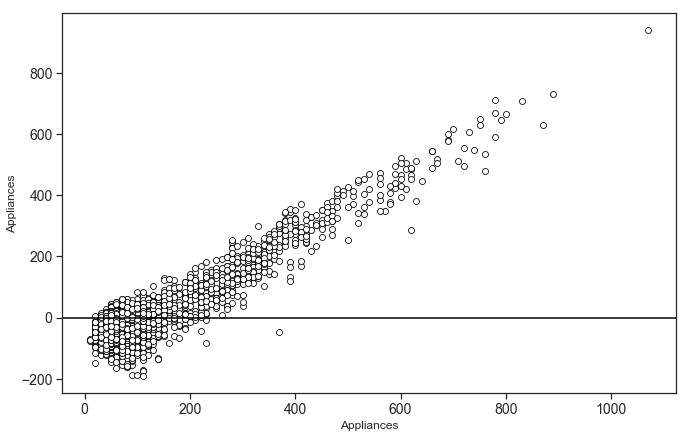

In [14]:
residual_test = y_test-predicted_test
plt.figure(figsize=(11,7))
sns.set_style('ticks')
sns.scatterplot(y_test, residual_test, color='white', linewidth=0.8, edgecolor='black')
plt.axhline(0, color='black')
plt.grid(False)

Residuals doesn't look like it is randomly scattered around horizontal axis and it looks like it is following a linear pattern and there is one noticeable outlier.

## Appliances energy consumption measurement for the whole period and a closer look at the first week of data.

In [8]:
# setting the index as datetime
energy = energy.set_index(pd.DatetimeIndex(energy['date']))

### Plot A: Energy consumption for the whole period

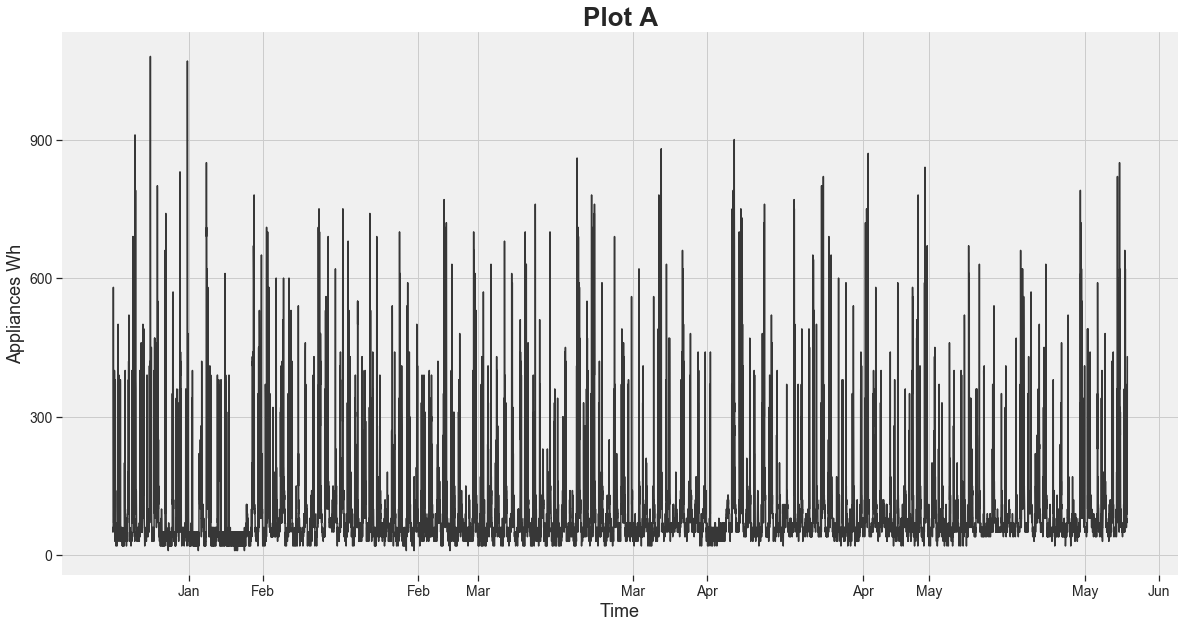

In [9]:
import matplotlib.dates as mdates
sns.set_style('ticks')
plt.figure(figsize=(20,10))
locator = mdates.MonthLocator()
fmt = mdates.DateFormatter('%b')
plot1 = sns.lineplot(x=energy.index.values, y=energy.Appliances, color='#373737')
X = plt.gca().xaxis
Y = plt.gca().yaxis
plot1.set_xlabel('Time', fontsize=18)
plot1.set_ylabel('Appliances Wh', fontsize=18)
X.set_major_formatter(fmt)
Y.set_major_locator(ticker.MaxNLocator(4))
plot1.set_title('Plot A', fontsize=26, fontweight='bold')
plot1.set_facecolor('#F0F0F0')
plt.grid(True)
sns.despine(bottom = True, left = True)

The plot shows high variability of energy consumption for whole period of data.

### Making a range for the first week of January

In [118]:
week1Dat = energy['2016-01-11 00:00' : '2016-01-18 17:00'].copy()
week1Dat.date = week1Dat.date.astype('datetime64[ns]')

### Plot B: Energy consumption for the first week of data

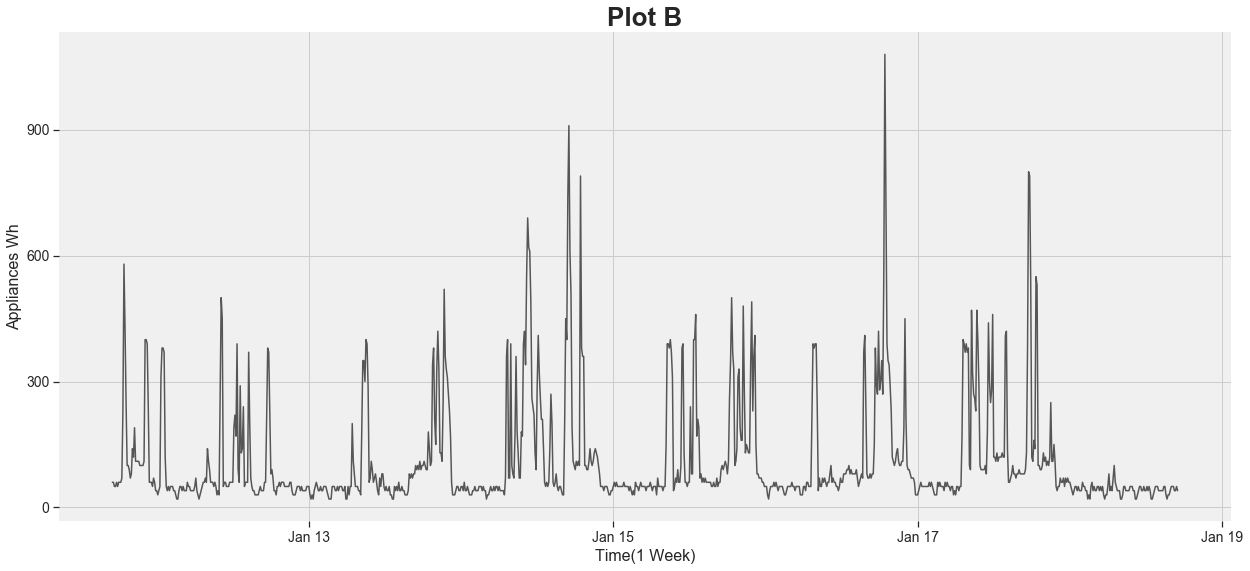

In [119]:
plt.figure(figsize=(21,9))
sns.set_style('ticks')
locator2 = mdates.MonthLocator()
fmt2 = mdates.DateFormatter('%b %d')
plot2 = sns.lineplot(x=week1Dat.date, y=week1Dat.Appliances, color='#565656')
X = plt.gca().xaxis
Y = plt.gca().yaxis
plot2.set_xlabel('Time(1 Week)', fontsize=16)
plot2.set_ylabel('Appliances Wh', fontsize=16)
X.set_major_formatter(fmt2)
X.set_major_locator(ticker.MaxNLocator(4))
Y.set_major_locator(ticker.MaxNLocator(4))
plot2.set_title('Plot B', fontsize=26, fontweight='bold')
plot2.set_facecolor('#F0F0F0')
plt.grid(True)
sns.despine(bottom = True, left = True)

Again in this closer look of the first week of data, energy consumption have a high variability.

## Appliances energy consumption distribution

### Histogram shows the frequency of energy consumption in the interval

C:\Users\huntr\Anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


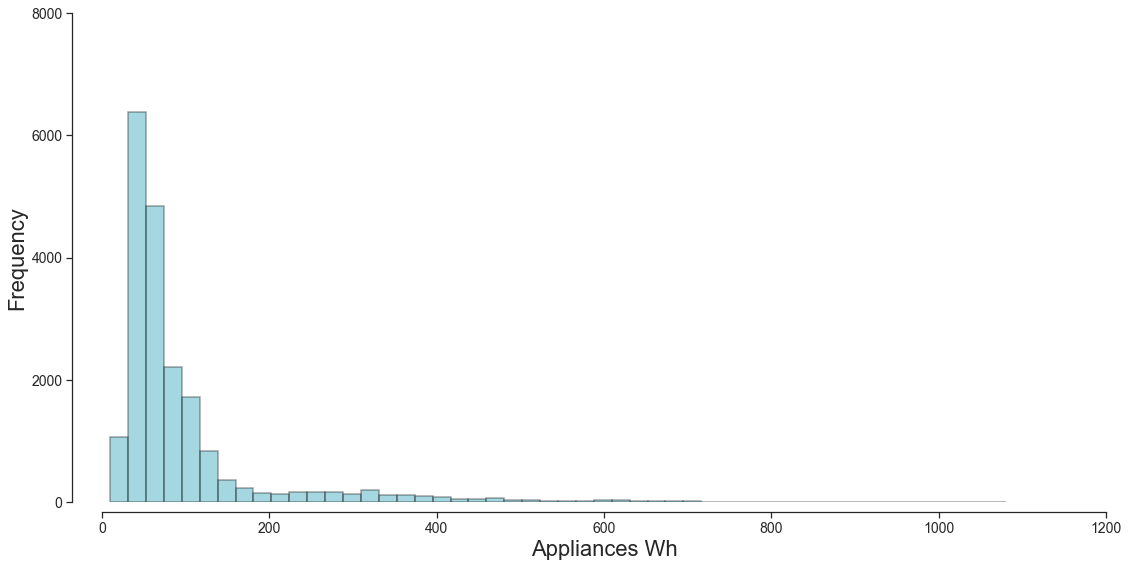

In [15]:
plt.figure(figsize=(18,9))
sns.set_style('ticks')
hist1 = sns.distplot(energy.Appliances, kde=False, color='#1d9db2', hist_kws=dict(edgecolor='k', linewidth=1.5))
hist1.set_ylabel('Frequency', fontsize=22)
hist1.set_xlabel('Appliances Wh', fontsize=22)
hist1.yaxis.set_major_locator(ticker.MaxNLocator(5))
plt.ylim(0,8000)
plt.xlim(0,1200)
sns.despine()
hist1.spines['left'].set_position(('outward', 30))
hist1.spines['bottom'].set_position(('outward', 10))

The histogram shows a skewed distribution, it has a long tail to the right.

### Boxplot shows the location of the median with the black line

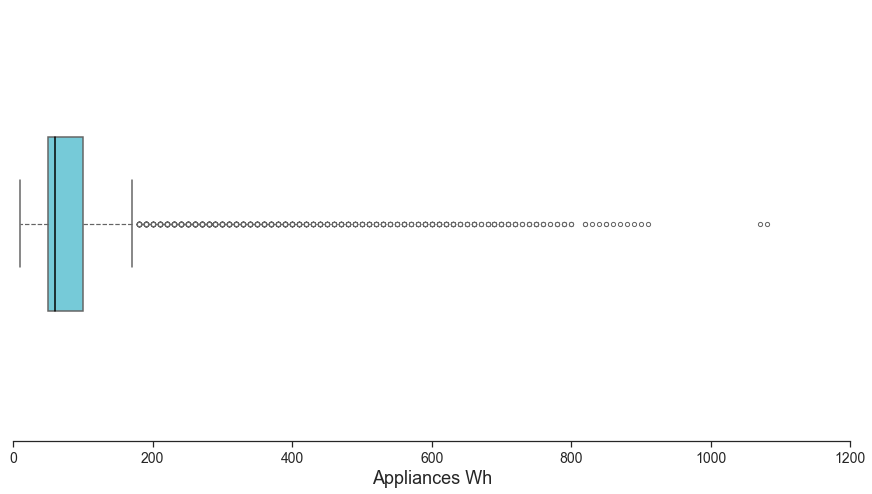

In [17]:
plt.figure(figsize=(15,8))
sns.set_style('ticks')
box1 = sns.boxplot(x=energy.Appliances, color='#66d6e8', 
                   medianprops={'color':'black'}, 
                   flierprops={'marker':'o','markerfacecolor':'w', 'markersize':'4.2'},
                   whiskerprops={'linestyle':'--', 'linewidth': '1.2'})
box1.set_xlabel('Appliances Wh', fontsize=18)
box1.axes.get_yaxis().set_visible(False)
plt.ylim(-1,1)
plt.xlim(0,1200)
sns.despine(left = True)

In the boxplot above, there are several outliers. The mean is also not quite in the middle meaning data above mean are much scattered.

## Pairplot between the energy consumption of appliances

Creating set to be plotted and function to display r score on upper map.

In [9]:
Set1 = train[['Appliances', 'lights', 'T1', 'RH_1', 'T2', 'RH_2', 'T3', 'RH_3']]
Set2 = train[['Appliances', 'T4', 'RH_4', 'T5', 'RH_5', 'T6', 'RH_6']]
Set3 = train[['Appliances', 'T7', 'RH_7', 'T8', 'RH_8', 'T9', 'RH_9']]
Set4 = train[['Appliances', 'T_out', 'Press_mm_hg', 'RH_out', 'Windspeed', 'Visibility', 'Tdewpoint', 'NSM', 'T6']]
def rscore(x, y, **kws):
    r, _ = stats.pearsonr(x, y)
    ax = plt.gca()
    ax.annotate("{:.2f}".format(r), xy = (0.55, 0.5), size=50, xycoords = ax.transAxes, va='center', ha='center')

## Pairplot

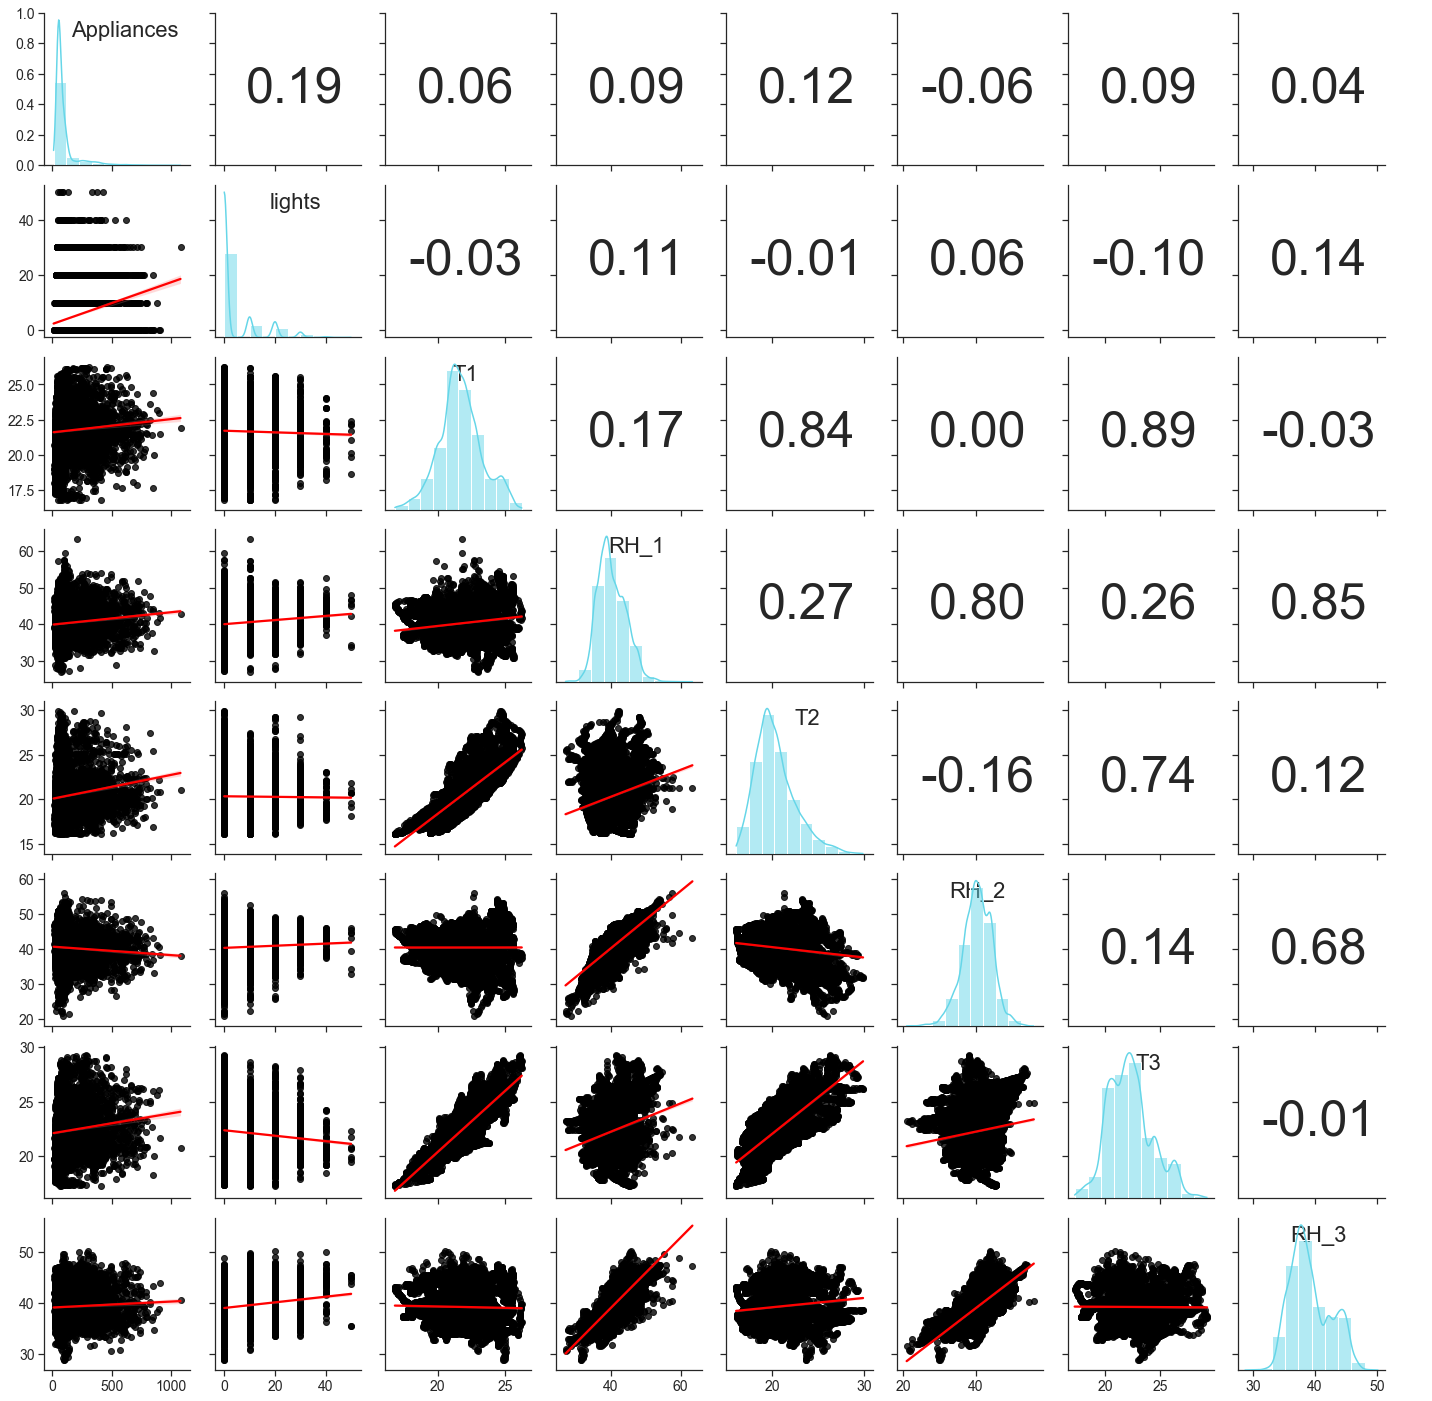

In [16]:
sns.set_style('ticks')
Pplot1 = sns.PairGrid(Set1, diag_sharey=False)
Pplot1.map_lower(sns.regplot, line_kws={'color':'red'}, color='black')
Pplot1.map_diag(sns.histplot,kde=True, color='#66d6e8', bins=10, discrete=False)
Pplot1.map_upper(rscore)

# Displaying variable names in diagonal histogram
for ax, col in zip(np.diag(Pplot1.axes), Set1.columns):
    ax.annotate(col, xy=(0.55, 0.95), xycoords = ax.transAxes, fontsize=22, va='top', ha='center')
    
# Removing x and y labels
for ax in Pplot1.axes.flatten():
    ax.set_ylabel('')
    ax.set_xlabel('')
    
# Ranges
#Pplot1.axes[0,0].set_ylim(-10,1100)
#Pplot1.axes[0,0].set_xlim(-10,1100)
#Pplot1.axes[1,1].set_ylim(-2, 52)
#Pplot1.axes[1,1].set_xlim(-2, 52)
#Pplot1.axes[2,2].set_ylim(17, 27)
#Pplot1.axes[2,2].set_xlim(17, 27)
#Pplot1.axes[3,3].set_ylim(25, 65)
#Pplot1.axes[3,3].set_xlim(25, 65)
#Pplot1.axes[4,4].set_ylim(15, 31)
#Pplot1.axes[4,4].set_xlim(15, 31)
#Pplot1.axes[5,5].set_ylim(20, 55)
#Pplot1.axes[5,5].set_xlim(20, 55)
#Pplot1.axes[6,6].set_ylim(16, 30)
#Pplot1.axes[6,6].set_xlim(16, 30)
#Pplot1.axes[7,7].set_ylim(28, 52)
#Pplot1.axes[7,7].set_xlim(28, 52)

Pplot1.axes[0,0].yaxis.set_major_locator(ticker.MaxNLocator(6))

There is a positive correlation between Appliances and lights (0.19) followed by Appliances and T2. For each T1-T3 they have a strong positive correlation since they are indoor rooms.  
There is also a negative correlation between T2 and RH_2 also for T3 and RH_3 but they have a really small value. 

(-2, 92)

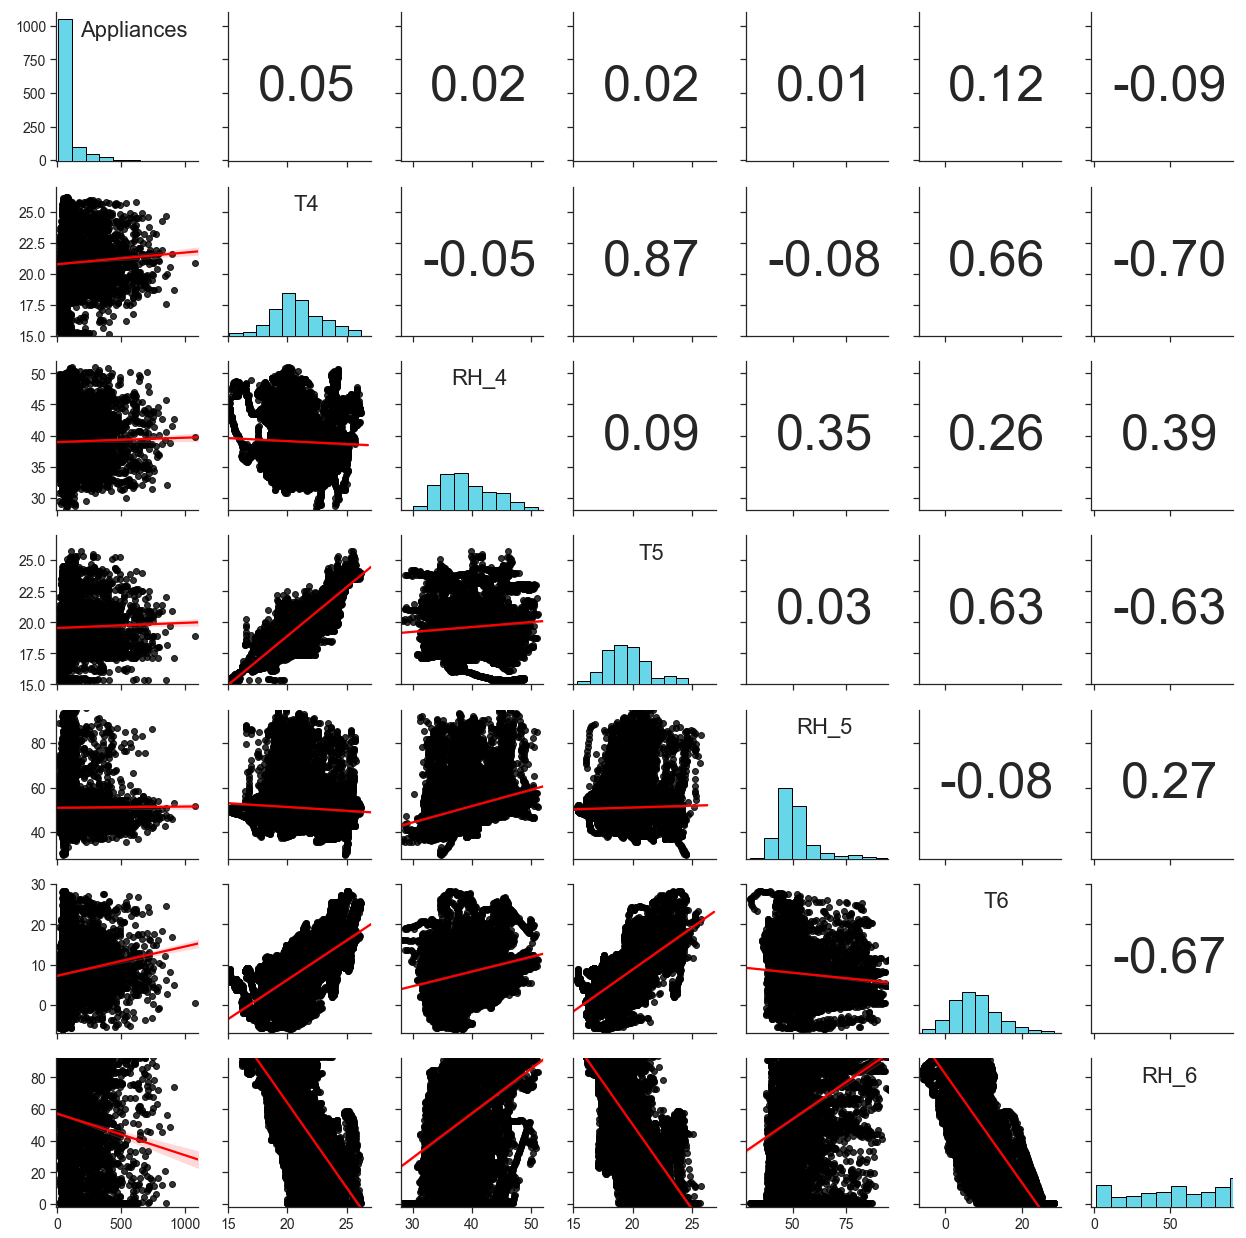

In [32]:
sns.set_style('ticks')
Pplot2 = sns.PairGrid(Set2)
Pplot2.map_lower(sns.regplot, line_kws={'color':'red'}, color='black')
Pplot2.map_diag(plt.hist, edgecolor='black', color='#66d6e8', linewidth=1, bins=10)
Pplot2.map_upper(rscore)

# Displaying variable names in diagonal histogram
for ax, col in zip(np.diag(Pplot2.axes), Set2.columns):
    ax.annotate(col, xy=(0.55, 0.95), xycoords = ax.transAxes, fontsize=22, va='top', ha='center')

# Removing x and y labels
for ax in Pplot2.axes.flatten():
    ax.set_ylabel('')
    ax.set_xlabel('')
    
# Ranges
Pplot2.axes[0,0].set_ylim(-10,1100)
Pplot2.axes[0,0].set_xlim(-10,1100)
Pplot2.axes[1,1].set_ylim(15, 27)
Pplot2.axes[1,1].set_xlim(15, 27)
Pplot2.axes[2,2].set_ylim(28, 52)
Pplot2.axes[2,2].set_xlim(28, 52)
Pplot2.axes[3,3].set_ylim(15, 27)
Pplot2.axes[3,3].set_xlim(15, 27)
Pplot2.axes[4,4].set_ylim(28, 95)
Pplot2.axes[4,4].set_xlim(28, 95)
Pplot2.axes[5,5].set_ylim(-7, 30)
Pplot2.axes[5,5].set_xlim(-7, 30)
Pplot2.axes[6,6].set_ylim(-2, 92)
Pplot2.axes[6,6].set_xlim(-2, 92)

There are some noticeable positive correlations such as T4 with T5 and T6, and T5 with T6. T6 have a negative correlation with RH_6. RH_6 seems to have some negative correlation with T4 and T5.

(28, 58)

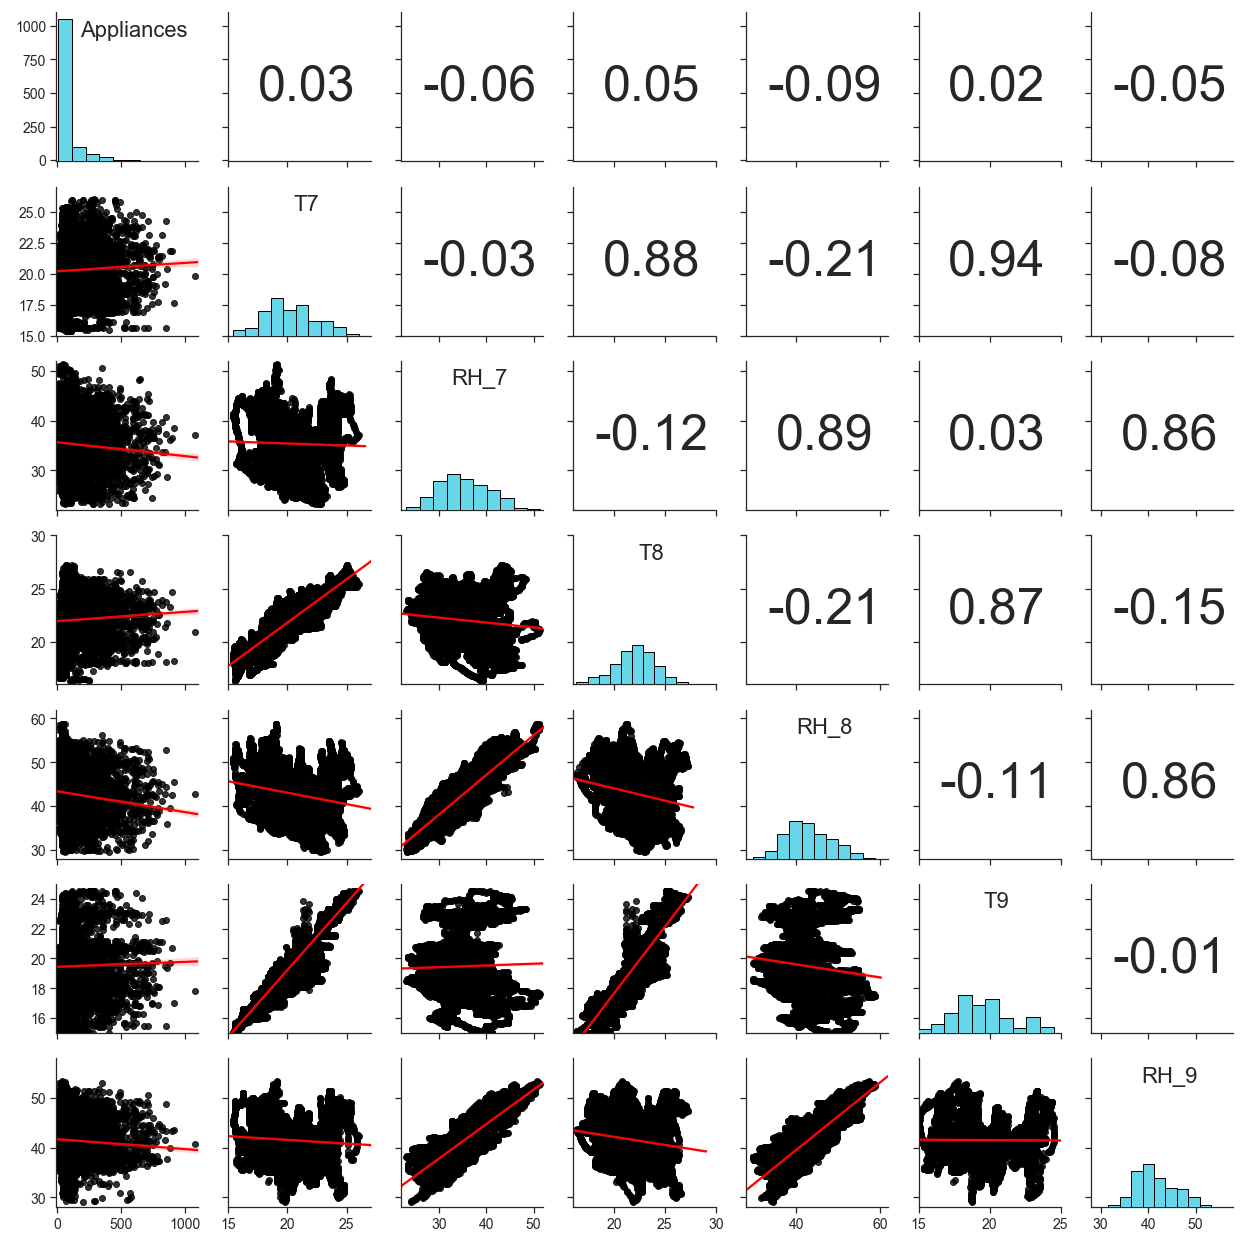

In [34]:
sns.set_style('ticks')
Pplot3 = sns.PairGrid(Set3)
Pplot3.map_lower(sns.regplot, line_kws={'color':'red'}, color='black')
Pplot3.map_diag(plt.hist, edgecolor='black', color='#66d6e8', linewidth=1, bins=10)
Pplot3.map_upper(rscore)

# Displaying variable names in diagonal histogram
for ax, col in zip(np.diag(Pplot3.axes), Set3.columns):
    ax.annotate(col, xy=(0.55, 0.95), xycoords = ax.transAxes, fontsize=22, va='top', ha='center')
    
# Removing x and y labels
for ax in Pplot3.axes.flatten():
    ax.set_ylabel('')
    ax.set_xlabel('')
    
# Ranges
Pplot3.axes[0,0].set_ylim(-10,1100)
Pplot3.axes[0,0].set_xlim(-10,1100)
Pplot3.axes[1,1].set_ylim(15, 27)
Pplot3.axes[1,1].set_xlim(15, 27)
Pplot3.axes[2,2].set_ylim(22, 52)
Pplot3.axes[2,2].set_xlim(22, 52)
Pplot3.axes[3,3].set_ylim(16, 30)
Pplot3.axes[3,3].set_xlim(16, 30)
Pplot3.axes[4,4].set_ylim(28, 62)
Pplot3.axes[4,4].set_xlim(28, 62)
Pplot3.axes[5,5].set_ylim(15, 25)
Pplot3.axes[5,5].set_xlim(15, 25)
Pplot3.axes[6,6].set_ylim(28, 58)
Pplot3.axes[6,6].set_xlim(28, 58)

Each T7-T9 have a positive correlation. T8 and RH_8 have a negative correlation. There seems to be a correlation between RH_7 with RH_8 and RH_9.

(-6, 17)

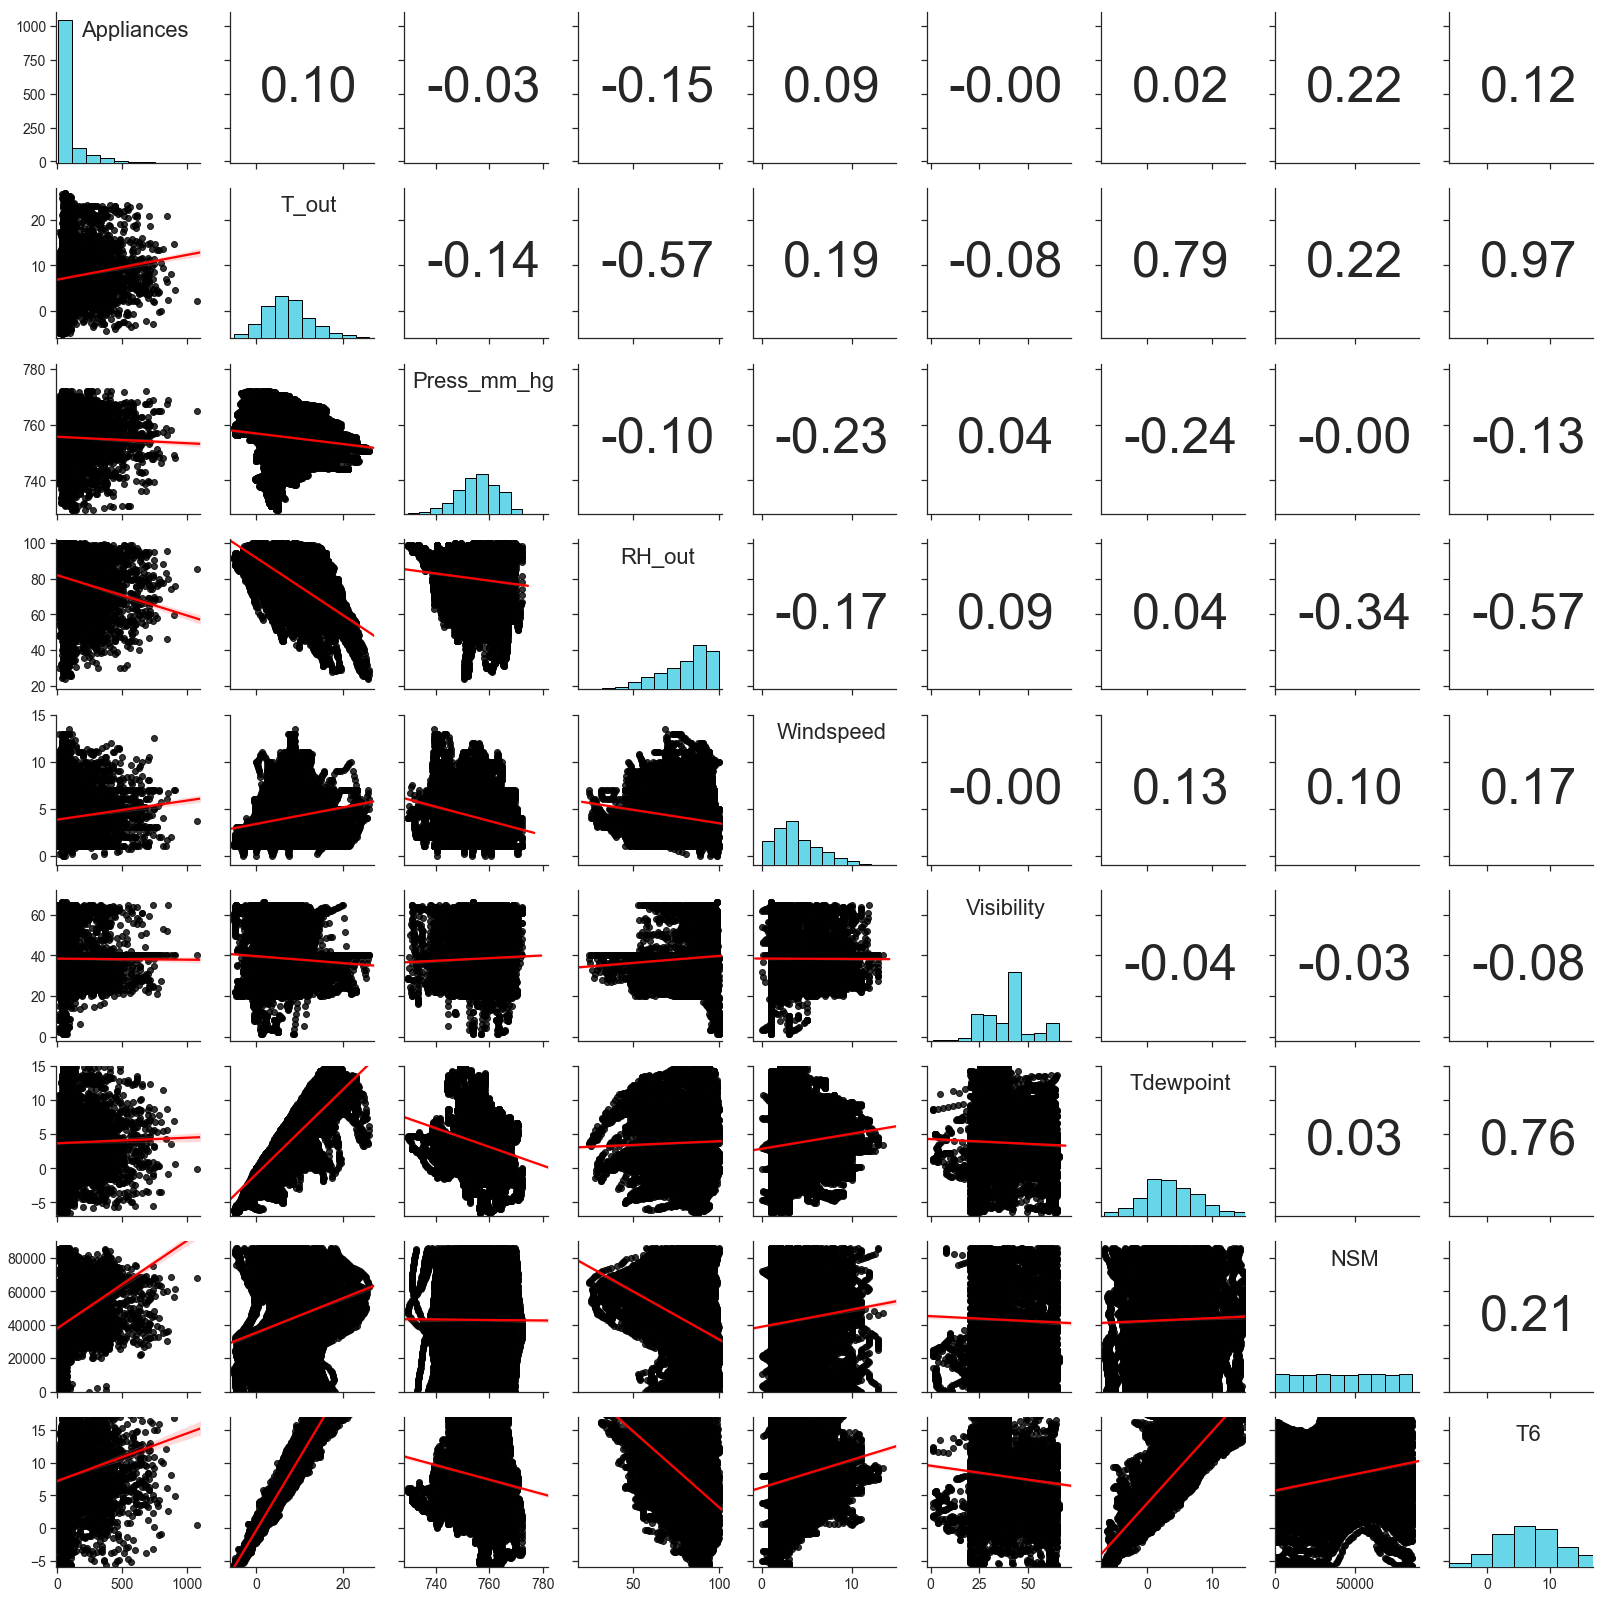

In [35]:
sns.set_style('ticks')
Pplot4 = sns.PairGrid(Set4)
Pplot4.map_lower(sns.regplot, line_kws={'color':'red'}, color='black')
Pplot4.map_diag(plt.hist, edgecolor='black', color='#66d6e8', linewidth=1, bins=10)
Pplot4.map_upper(rscore)

# Displaying variable names in diagonal histogram
for ax, col in zip(np.diag(Pplot4.axes), Set4.columns):
    ax.annotate(col, xy=(0.55, 0.95), xycoords = ax.transAxes, fontsize=22, va='top', ha='center')
    
# Removing x and y labels
for ax in Pplot4.axes.flatten():
    ax.set_ylabel('')
    ax.set_xlabel('')
    
# Ranges
Pplot4.axes[0,0].set_ylim(-10,1100)
Pplot4.axes[0,0].set_xlim(-10,1100)
Pplot4.axes[1,1].set_ylim(-6, 27)
Pplot4.axes[1,1].set_xlim(-6, 27)
Pplot4.axes[2,2].set_ylim(728, 782)
Pplot4.axes[2,2].set_xlim(728, 782)
Pplot4.axes[3,3].set_ylim(18, 102)
Pplot4.axes[3,3].set_xlim(18, 102)
Pplot4.axes[4,4].set_ylim(-1, 15)
Pplot4.axes[4,4].set_xlim(-1, 15)
Pplot4.axes[5,5].set_ylim(-2, 72)
Pplot4.axes[5,5].set_xlim(-2, 72)
Pplot4.axes[6,6].set_ylim(-7, 15)
Pplot4.axes[6,6].set_xlim(-7, 15)
Pplot4.axes[7,7].set_ylim(-100, 90000)
Pplot4.axes[7,7].set_xlim(-100, 90000)
Pplot4.axes[8,8].set_ylim(-6, 17)
Pplot4.axes[8,8].set_xlim(-6, 17)

Tdewpoint and T6 seems to have a strong positive correlation. T_out and Tdewpoint also have a strong positive correlation (0.79). Pressure and Tdewpoint seems to have a negative correlation also with T6. T_out and T6 have a very strong positive correlation (0.97). Some strong negative correlation is found between RH_out with NSM, T6 and a negative correlation with windspeed.

## Heatmap for hourly energy consumption of appliances for four consecutive weeks.

Getting the data for date and appliances

In [14]:
heatmapData = energy[['date', 'Appliances']]
colnames = heatmapData.columns
heatmapData.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 19735 entries, 2016-01-11 17:00:00 to 2016-05-27 17:40:00
Data columns (total 2 columns):
date          19735 non-null object
Appliances    19735 non-null int64
dtypes: int64(1), object(1)
memory usage: 462.5+ KB


Function to get weekday and hour then making it to a new columns

In [15]:
def get_datetime(dt):
    '''function to return the weekday and hour of date in data(dt)'''
    dt = datetime.strptime(dt, '%Y-%m-%d %H:%M:%S')
    return [dt.weekday(), dt.hour]

heatmapData = heatmapData.merge(heatmapData.date.apply(
                                lambda x: pd.Series(get_datetime(x))), left_index=True, right_index = True)

In [16]:
# add existing columns and add the new columns
heatmapData.columns = colnames.tolist() + ['day_of_week', 'hour']
heatmapData.head()

,date,Appliances,day_of_week,hour
date,,,,
2016-01-11 17:00:00,2016-01-11 17:00:00,60,0,17
2016-01-11 17:10:00,2016-01-11 17:10:00,60,0,17
2016-01-11 17:20:00,2016-01-11 17:20:00,50,0,17
2016-01-11 17:40:00,2016-01-11 17:40:00,60,0,17
2016-01-11 17:50:00,2016-01-11 17:50:00,50,0,17


#### Grouping by the first to last week of January

In [17]:
week1 = heatmapData['2016-01-11' : '2016-01-17']
week2 = heatmapData['2016-01-18' : '2016-01-24']
week3 = heatmapData['2016-01-25' : '2016-01-31']
week4 = heatmapData['2016-02-01' : '2016-02-07']

Getting the sum of consumption energy by grouping them into hour and day of week.

In [18]:
week1_grouped = week1[['day_of_week', 'hour', 'Appliances']].groupby(['hour', 'day_of_week']).sum()
week2_grouped = week2[['day_of_week', 'hour', 'Appliances']].groupby(['hour', 'day_of_week']).sum()
week3_grouped = week3[['day_of_week', 'hour', 'Appliances']].groupby(['hour', 'day_of_week']).sum()
week4_grouped = week4[['day_of_week', 'hour', 'Appliances']].groupby(['hour', 'day_of_week']).sum()

print(week2_grouped.head())

# unstacking
heatmapW1 = week1_grouped.unstack()
heatmapW2 = week2_grouped.unstack()
heatmapW3 = week3_grouped.unstack()
heatmapW4 = week4_grouped.unstack()

# Fill nan values with 0 because for the first week of data there is no data
heatmapW1 = heatmapW1.fillna(0)

# Checking number of rows and columns
print(heatmapW1.shape)
print(heatmapW2.shape)
print(heatmapW3.shape)
print(heatmapW4.shape)

                  Appliances
hour day_of_week            
0    0                   270
     1                   280
     2                   220
     3                   250
     4                   240
(24, 7)
(24, 7)
(24, 7)
(24, 7)


Sorting data so 0 comes first at bottom and hour 24 comes last at top in the heatmap later.

In [19]:
heatmapW1 = heatmapW1.sort_values(by='hour', ascending=False)
heatmapW2 = heatmapW2.sort_values(by='hour', ascending=False)
heatmapW3 = heatmapW3.sort_values(by='hour', ascending=False)
heatmapW4 = heatmapW4.sort_values(by='hour', ascending=False)

In [20]:
# Checking the data
heatmapW1.head()

Appliances                                              
day_of_week          0      1       2       3       4       5      6
hour                                                                
23               340.0  260.0   250.0   230.0   380.0   330.0  380.0
22              1600.0  280.0   790.0   290.0  1310.0  1020.0  330.0
21               620.0  250.0  1880.0   700.0  1380.0   720.0  780.0
20               750.0  310.0  1490.0   660.0  1400.0   710.0  660.0
19              1040.0  330.0  1280.0  1390.0  1320.0  2350.0  610.0

## Heatmap

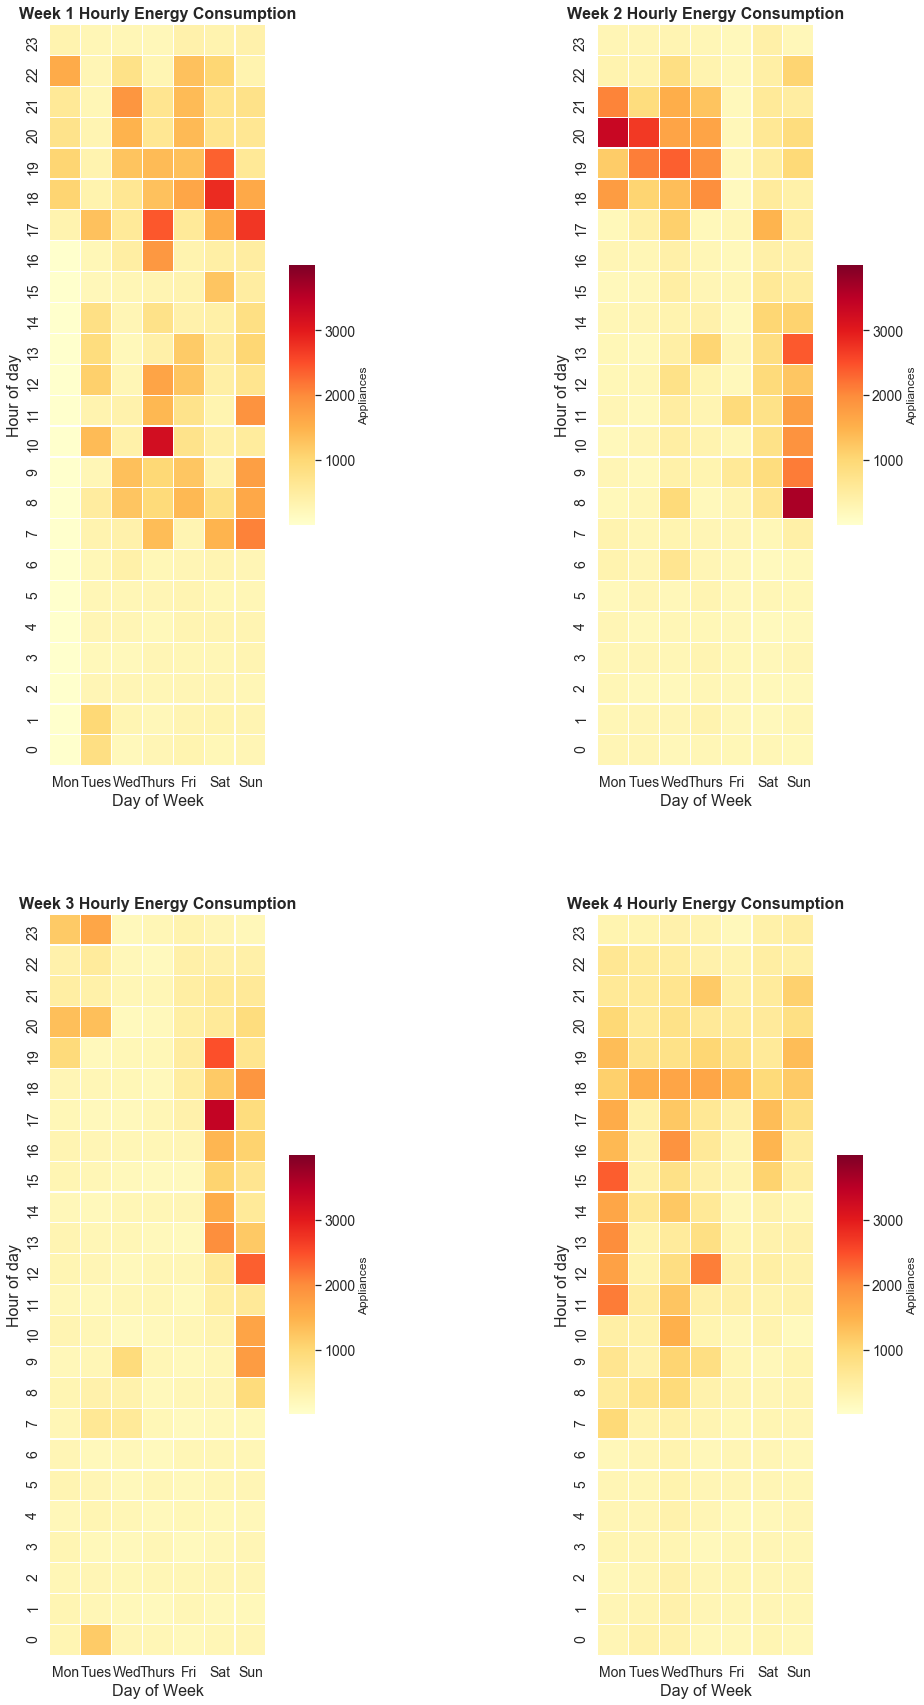

In [35]:
fig, axes = plt.subplots(2,2, figsize=(18,30), facecolor='w', edgecolor='k')
sns.set_style('white')
# fmt='g', annot_kws={'size':12}

cbar_kws = {'shrink': .35, 'ticks':[1000, 2000, 3000], 'aspect':'10', 'label':'Appliances'}

sns.heatmap(heatmapW1, ax=axes[0,0], linewidths = .2, cmap="YlOrRd", vmin=0, vmax=4000, cbar_kws=cbar_kws, square=True)
sns.heatmap(heatmapW2, ax=axes[0,1], linewidths = .2, cmap="YlOrRd", vmin=0, vmax=4000, cbar_kws=cbar_kws, square=True)
sns.heatmap(heatmapW3, ax=axes[1,0], linewidths = .2, cmap="YlOrRd", vmin=0, vmax=4000, cbar_kws=cbar_kws, square=True)
sns.heatmap(heatmapW4, ax=axes[1,1], linewidths = .2, cmap="YlOrRd", vmin=0, vmax=4000, cbar_kws=cbar_kws, square=True)


#for adding week n in title 
n=1

for i in range(2):
    for j in range(2):
        axes[i,j].set_title("Week "+str(n)+" Hourly Energy Consumption", fontsize=16, fontweight='bold')
        axes[i,j].set_xlabel("Day of Week", fontsize=16)
        axes[i,j].set_ylabel('Hour of day', fontsize=16)
        axes[i,j].set_xticklabels(['Mon', 'Tues', 'Wed', 'Thurs', 'Fri', 'Sat', 'Sun'], fontsize=14, rotation='horizontal')
        n+=1

There are patterns in energy use in night time for week 1-4, though for week 3 it's only at weekends. There are also patterns in weekends of those weeks where energy use is more high compared to weekdays.  
Some noticeable hour is when it reaches noon, energy use starts to rise.  
For the first week it seems that the energy use starts to rise each day at 6 am.

## Recursive Feature Estimation

In [44]:
estimator = LinearRegression()
rmse_scores = []
for i in range(1,36):
    selector = RFE(estimator, n_features_to_select=i, step=1)
    selector = selector.fit(X_train, y_train)
    y_test_pred = selector.predict(X_test)
    rmse_test = np.sqrt(mean_squared_error(y_test, y_test_pred))
    print("RMSE score on test set using", i, "features: ", rmse_test)
    rmse_scores.append(rmse_test)

RMSE score on test set using 1 features:  101.26888895164174
RMSE score on test set using 2 features:  99.12399407311729
RMSE score on test set using 3 features:  98.92249989546323
RMSE score on test set using 4 features:  97.97137950937748
RMSE score on test set using 5 features:  97.87877773888789
RMSE score on test set using 6 features:  97.79879832642702
RMSE score on test set using 7 features:  97.54264516067863
RMSE score on test set using 8 features:  97.4383034495254
RMSE score on test set using 9 features:  96.97841033120521
RMSE score on test set using 10 features:  95.04617607469439
RMSE score on test set using 11 features:  95.02193708768031
RMSE score on test set using 12 features:  94.9073006369462
RMSE score on test set using 13 features:  94.68863860202237
RMSE score on test set using 14 features:  94.70687758710378
RMSE score on test set using 15 features:  94.68431856934914
RMSE score on test set using 16 features:  94.69881903708233
RMSE score on test set using 17 fe

In [45]:
rmse_scores

[101.26888895164174,
 99.12399407311729,
 98.92249989546323,
 97.97137950937748,
 97.87877773888789,
 97.79879832642702,
 97.54264516067863,
 97.4383034495254,
 96.97841033120521,
 95.04617607469439,
 95.02193708768031,
 94.9073006369462,
 94.68863860202237,
 94.70687758710378,
 94.68431856934914,
 94.69881903708233,
 94.69881903708233,
 94.69881903708233,
 94.69881903708233,
 94.69255463778536,
 93.36896366298174,
 93.28385154062673,
 93.29369806417367,
 93.30657491899885,
 93.30996326942872,
 93.31573414160862,
 93.3248817812589,
 93.31898731190083,
 93.32222622748658,
 93.33551153396279,
 93.2942516005081,
 93.29808618950878,
 93.30477972512776,
 93.30457789162362,
 93.17607638358606]

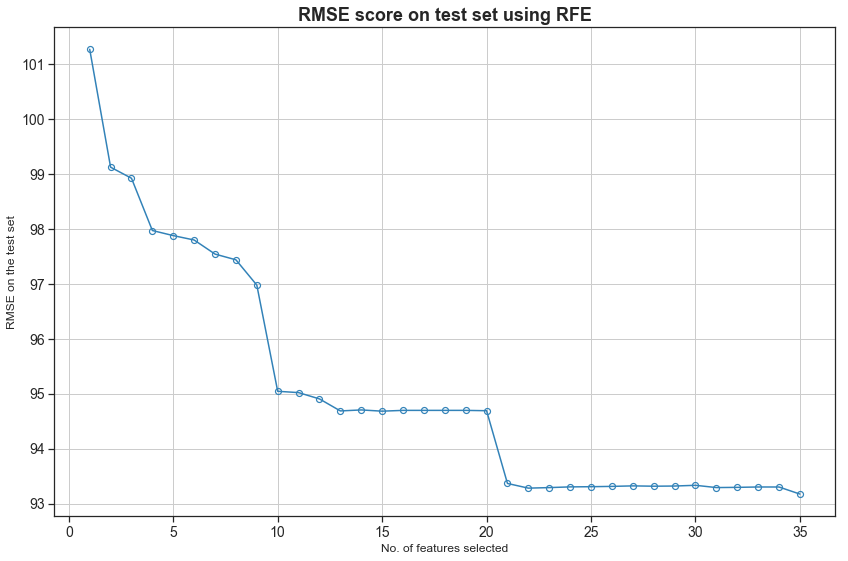

In [46]:
plt.figure(figsize=(14,9))
sns.set_style('ticks')
plt.xlabel('No. of features selected')
plt.ylabel('RMSE on the test set')
plt.title('RMSE score on test set using RFE', fontsize=18, fontweight='bold')
sns.lineplot(range(1, 36), rmse_scores, marker = 'o', color = '#3282b8', markeredgewidth = 1.2,
         markeredgecolor = '#3282b8', markerfacecolor = 'None')
plt.grid(True)

In [15]:
modelrfe = LinearRegression()
k = StratifiedKFold(n_splits=10, random_state=42)
rfecv = RFECV(estimator=model, step=1, cv=k, scoring='neg_mean_squared_error')
rfecv = rfecv.fit(X_train, y_train)

C:\Users\huntr\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:652: Warning: The least populated class in y has only 1 members, which is too few. The minimum number of members in any class cannot be less than n_splits=10.
  % (min_groups, self.n_splits)), Warning)


In [16]:
print('Optimal number of features :', rfecv.n_features_)
print('Best features :', X_train.columns[rfecv.support_])

Optimal number of features : 23
Best features : Index(['lights', 'T1', 'RH_1', 'T2', 'RH_2', 'T3', 'RH_3', 'T6', 'RH_7', 'T8',
       'RH_8', 'T9', 'T_out', 'Windspeed', 'Friday', 'Monday', 'Saturday',
       'Sunday', 'Thursday', 'Tuesday', 'Wednesday', 'Weekday', 'Weekend'],
      dtype='object')


C:\Users\huntr\Anaconda3\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


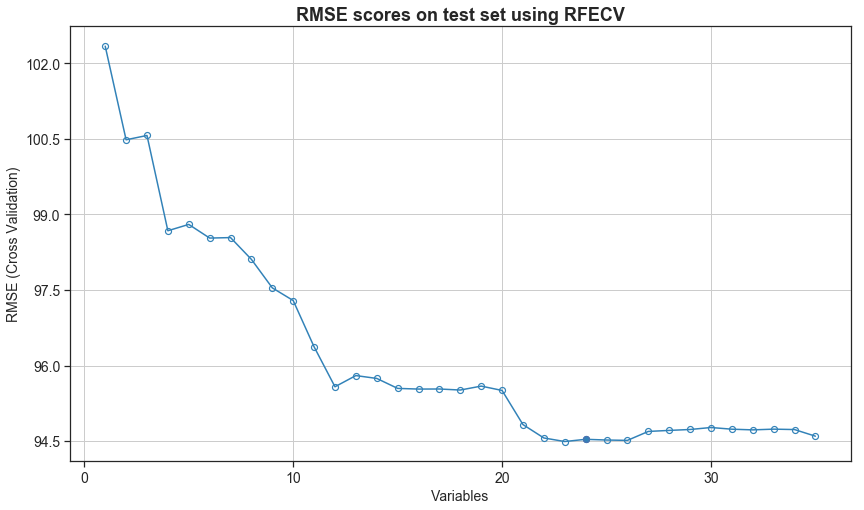

In [32]:
# Plot number of features VS. cross-validation scores RMSE
plt.figure(figsize=(14,8))
plt.xlabel("Variables", fontsize=14)
plt.ylabel("RMSE (Cross Validation)", fontsize=14)
plt.title('RMSE scores on test set using RFECV', fontsize=18, fontweight='bold')

sns.set_style('ticks')

rmse_cv_scores = np.sqrt(-rfecv.grid_scores_)
rfeplot = sns.lineplot(range(1, len(rfecv.grid_scores_) + 1), rmse_cv_scores, marker='o', color='#3282b8',
                       markerfacecolor = 'None', markeredgecolor = '#3282b8', markeredgewidth = 1.2)
plt.plot(24, rmse_cv_scores[23], marker='o', markerfacecolor = '#3282b8', markeredgewidth = 1.2)
plt.grid(True)
rfeplot.xaxis.set_major_locator(ticker.MaxNLocator(4))
rfeplot.yaxis.set_major_locator(ticker.MaxNLocator(6))


plt.show()

Firstly, RFECV scores here are very different compared to in the paper (scores are more higher here).
<br>Then, in here the filled dot which represent the optimal number of predictors are 24, meanwhile in the paper it's 34.</br>
<br>In the rfecv plot above the rmse scores start dropping when it's more than 10 variables, while in the paper it starts dropping when it's under 10 variables.</br>

## Conclusion

- Regression model scores on test model seems to drop a little from train model. The scores match with the provided scores on paper though there is some score which not exactly match.  
- Residual plot does not seem to support linear model as the residuals seems to following some pattern.  
- Distribution plots match with the provided plots on the paper though is not perfectly matching.  
- Pairplots showed that theres some positive correlation between the indoor rooms. There are some rooms temperature that have a negative correlation with it's humidity. The outside temperature seems to have a negative correlation with Tdewpoint.  
- In the heatmaps of energy consumption for first 4 weeks there is a pattern that shows at night the use of energy is more higher. There are also patterns for weekends where the use of energy is high.  
- RFECV scores are different from the provided on paper. The scores here are more higher than the provided. Here the optimal number of predictors are 24.